In [7]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

### Problem
In this challenge, The target is to Identify the language  that a piece of text is written in, which is in any of South Africa's 11 Official languages. 

In [14]:
# Load the train dataset
df_train = pd.read_csv('train_set.csv')
# value count for each language
df_train["lang_id"].value_counts()

# Display.max_colwidth option  set to None to show all text content without truncation
pd.set_option('display.max_colwidth', None)
#load the test dataset
df_test = pd.read_csv('test_set.csv')

In [15]:
#view first 3 row of train dataset
df_train.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months


In [16]:
#view tail of test dataset
df_test.tail(3)

,index,text
5679,5680,"E Ka kopo etsa kgetho ya hao ka hloko, hobane ha o na ho kgona ho fetola kgetho ena hara selemo ntle le tumello ya Boto ya Batshwaredi."
5680,5681,"TB ke bokudi ba PMB, mme Morero o tla lefella tlhahlobo ya ho sheba lefu lena. Leha ho le jwalo, o tlameha ho fumana kalafo ya hao ya TB ditsing tsa Mmuso."
5681,5682,Vakatjhela iwebhusayidi yethu ku-www.


In [18]:
# separating the independent and dependant features
X = df_train["text"]
y = df_train["lang_id"]


In [19]:
#create empty list to store modified texts
modified_data = []

for word in X:
    # removing the special characters and numbers
    word = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', word)
    word = re.sub(r'[[]]', ' ', word)
    # convert the text to lower case
    word = word.lower()
    # appending to empty modified data list
    modified_data.append(word)

In [20]:
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


In [21]:
x_train

31358                                                                                      mang le mang o na le tokelo ya go šomiša polelo ya gagwe le go kgatha tema mererong ya setšo sa boikgethelo fela ga go yo a swanetšego go dira tše ka tsela ye e lego kgahlanong le mabaka a itšego a molao wa ditokelo
13324                                                                                           metsi a hlokehang ho phetha mabaka a ho phedisa setjhaba a tla bolokwa mme a bitswe polokelo mme a ba tla bohlokwa ho feta metsi a mang tshebediso ya metsi bakeng sa mabaka a mang e tla ba teng ka tumello feela
10527         emacembu etepolitiki lamelwe ephalamende yavelonkhe nobe kusishayamtsetfo sesifundza lesitsintsekako kuye ngesimo atawuba nelilungelo lekwenta tetfulo letibhaliwe letihambisana nekucutjungulwa kwaloludzaba kungakapheli sikhatsi lesiphawulwe emiyalelweni leniketwe ngaphasi kwemtseshwanasimiso
29864                                                                  badiriši

### Modelling
**Using Logistic regression Model**

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Assuming you have the training data x_train and corresponding labels y_train
# Create the pipeline
lr = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

# Train the pipeline
lr.fit(x_train, y_train)



Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [23]:
pred_lr = lr.predict(x_test)

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Classification Report')
print(classification_report(y_test, pred_lr))

print("The accuracy score of the SVC is:", accuracy_score(y_test, pred_lr))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       596
         eng       1.00      1.00      1.00       567
         nbl       1.00      0.98      0.99       631
         nso       1.00      1.00      1.00       601
         sot       1.00      1.00      1.00       608
         ssw       0.99      1.00      1.00       615
         tsn       1.00      1.00      1.00       597
         tso       1.00      1.00      1.00       591
         ven       1.00      1.00      1.00       621
         xho       0.99      1.00      0.99       609
         zul       0.98      0.99      0.98       564

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

The accuracy score of the SVC is: 0.9954545454545455


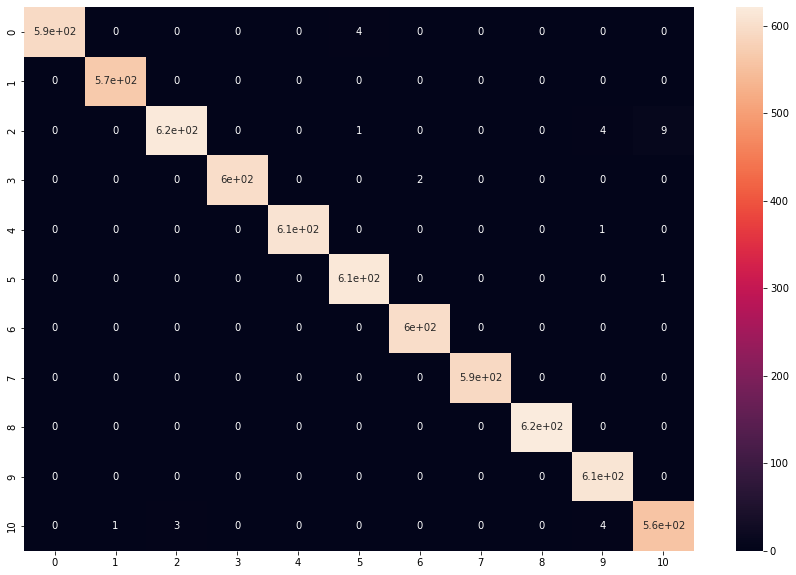

In [25]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, pred_lr)
cm = confusion_matrix(y_test, pred_lr)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Kaggle Submission

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# prediction = stacking_NB2.predict(X_test)
prediction = nb_classifier.predict(x_test)


In [61]:
X = df_test['text']
# Vectorize = vect.transform(X)

# vectorized_data = vectorizer.fit_transform(X)

In [62]:
print(type(prediction))

<class 'numpy.ndarray'>


In [63]:
df_test['lang_id'] = nb_classifier.predict(X)

In [64]:
submission = df_test[['index', 'lang_id']]
submission.to_csv('my_submission3.csv',index=False)
submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot


## Let's try out some other models
**Random Forest Classifier**

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# Assuming you have the training data x_train and corresponding labels y_train
# Create the pipeline
rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier())])

# Train the pipeline
rf.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [40]:
pred_rf = rf.predict(x_test)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Classification Report')
print(classification_report(y_test, pred_rf))

print("The accuracy score of the SVC is:", accuracy_score(y_test, pred_rf))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       0.99      1.00      1.00       567
         nbl       0.99      0.94      0.96       631
         nso       1.00      1.00      1.00       601
         sot       1.00      1.00      1.00       608
         ssw       0.99      0.97      0.98       615
         tsn       1.00      1.00      1.00       597
         tso       1.00      1.00      1.00       591
         ven       1.00      1.00      1.00       621
         xho       0.96      0.99      0.98       609
         zul       0.94      0.96      0.95       564

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600

The accuracy score of the SVC is: 0.9869696969696969


**Naive Bayes Classifier**

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
# Assuming you have the training data x_train and corresponding labels y_train
# Create the pipeline
nb_classifier = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

# Train the pipeline
nb_classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [57]:
pred_nb_classifier = nb_classifier.predict(x_test)

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Classification Report')
print(classification_report(y_test, pred_nb_classifier))

print("The accuracy score of the SVC is:", accuracy_score(y_test, pred_nb_classifier))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       0.99      1.00      1.00       567
         nbl       1.00      1.00      1.00       631
         nso       1.00      1.00      1.00       601
         sot       1.00      1.00      1.00       608
         ssw       1.00      1.00      1.00       615
         tsn       1.00      1.00      1.00       597
         tso       1.00      1.00      1.00       591
         ven       1.00      1.00      1.00       621
         xho       1.00      1.00      1.00       609
         zul       1.00      1.00      1.00       564

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

The accuracy score of the SVC is: 0.9995454545454545


**Support Vector Machines(SVM)**

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

svm_classifier = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])

# Train the pipeline
svm_classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC())])

In [52]:
pred_svm_classifier = svm_classifier.predict(x_test)

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('Classification Report')
print(classification_report(y_test, pred_svm_classifier))

print("The accuracy score of the SVC is:", accuracy_score(y_test, pred_svm_classifier))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       596
         eng       0.99      1.00      0.99       567
         nbl       0.99      0.94      0.96       631
         nso       1.00      1.00      1.00       601
         sot       1.00      1.00      1.00       608
         ssw       0.99      0.97      0.98       615
         tsn       1.00      1.00      1.00       597
         tso       1.00      1.00      1.00       591
         ven       1.00      1.00      1.00       621
         xho       0.97      0.99      0.98       609
         zul       0.92      0.97      0.94       564

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600

The accuracy score of the SVC is: 0.9860606060606061
